54
# **1. IMPORT DATASETA**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adnahajdarevi","key":"7e6ae2ed990d823825a09cc204c65076"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d truthisneverlinear/bach-breast-cancer-histology-images

Dataset URL: https://www.kaggle.com/datasets/truthisneverlinear/bach-breast-cancer-histology-images
License(s): CC0-1.0
100% 12.5G/12.5G [01:18<00:00, 186MB/s]
100% 12.5G/12.5G [01:18<00:00, 171MB/s]


In [ ]:
!unzip bach-breast-cancer-histology-images.zip -d bach_dataset

Archive:  bach-breast-cancer-histology-images.zip
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/Thumbs.db  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b001.tif  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b002.tif  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b003.tif  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b004.tif  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b005.tif  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b006.tif  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b007.tif  
  inflating: bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b008.tif  
  inflating: bach_dataset/ICIAR2018_BACH

# **2. IMPORT POTREBNIH BIBLIOTEKA**

In [ ]:
!pip install opencv-python-headless
!pip install numpy matplotlib scikit-learn tensorflow

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization,
                                     Activation, GlobalAveragePooling2D, Dense, Dropout)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# **3. ANALIZA PODATAKA**

In [ ]:
import os

def folder_size(path):
    total = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if os.path.isfile(fp):
                total += os.path.getsize(fp)
    return total

# Tvoj folder:
folder_path = "/content/bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos"
folder_path2 = "/content/bach_dataset/"
size_bytes = folder_size(folder_path)
size_gb = size_bytes / (1024 ** 3)
print(f"Veličina ukupnog foldera: {size_gb:.2f} GB")

size_bytes2 = folder_size(folder_path2)
size_gb2 = size_bytes2 / (1024 ** 3)
print(f"Veličina foldera kojeg ćemo mi koristiti: {size_gb2:.2f} GB")

Veličina ukupnog foldera: 6.87 GB
Veličina foldera kojeg ćemo mi koristiti: 16.98 GB


Klase: ['Benign', 'InSitu', 'Invasive', 'Normal']

Broj slika po klasi:
Benign: 100 slika
InSitu: 100 slika
Invasive: 100 slika
Normal: 100 slika

Primjeri dimenzija slika:
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)


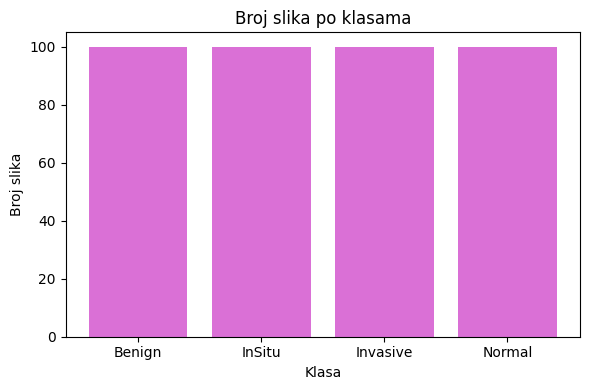

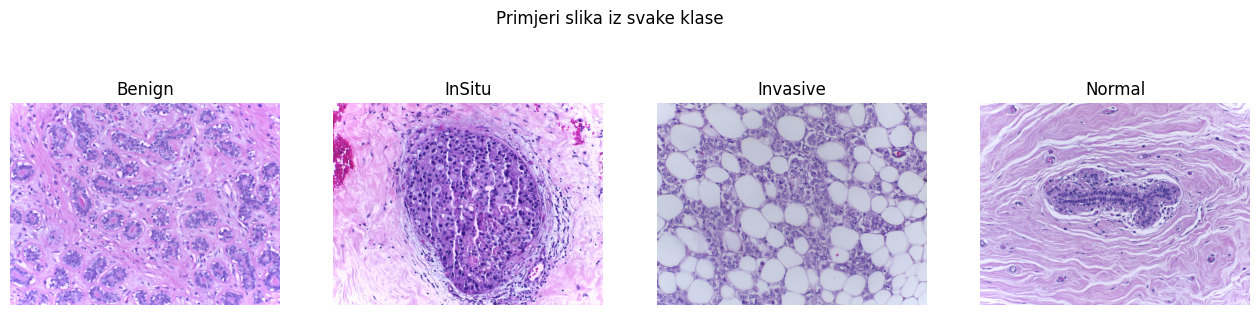

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

data_dir = "/content/bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos"

class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print("Klase:", class_names)

class_counts = {}
image_shapes = []

for cls in class_names:
    folder_path = os.path.join(data_dir, cls)
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif'))]
    class_counts[cls] = len(files)

    for img_name in files[:2]:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_shapes.append(img.shape)

print("\nBroj slika po klasi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} slika")

print("\nPrimjeri dimenzija slika:")
for shape in image_shapes[:5]:
    print(shape)

plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='orchid')
plt.title("Broj slika po klasama")
plt.xlabel("Klasa")
plt.ylabel("Broj slika")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, cls in enumerate(class_names):
    cls_path = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif'))]
    img = cv2.imread(os.path.join(cls_path, img_files[0]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(cls)
plt.suptitle("Primjeri slika iz svake klase")
plt.show()


In [ ]:
# REZOLUCIJA SLIKE
from PIL import Image
image_path = "/content/bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b001.tif"

with Image.open(image_path) as img:
    width, height = img.size
    print(f"Rezolucija slike: {width} x {height}")

Rezolucija slike: 2048 x 1536


# **4. PRIPREMA PODATAKA**

In [ ]:
# REZOLUCIJA SLIKE 384x384
import cv2
def preprocess_image(img):
    img = cv2.resize(img, (384,384))
    return img

In [ ]:
# AUGMENTACIJA PODATAKA
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=15/180.0
)

In [ ]:
NUM_CLASSES = 4  # 4 classes in BACH dataset: Benign, InSitu, Invasive, Normal
TRAIN_DATASET_PATH="bach_dataset/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos"

In [ ]:
# UČITAVANJE I OBRADA DATASETA
def load_dataset(base_path):
    images = []
    labels = []
    filenames = []  # <-- new list to keep filenames
    class_names = sorted([d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))])
    print("Classes found:", class_names)

    for label_index, class_name in enumerate(class_names):
        class_dir = os.path.join(base_path, class_name)
        for fname in os.listdir(class_dir):
            if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
                img_path = os.path.join(class_dir, fname)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: couldn't read image {img_path}")
                    continue
                processed = preprocess_image(img)
                images.append(processed)
                labels.append(label_index)
                filenames.append(fname)  # <-- save the filename here

    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)
    return images, labels, filenames, class_names

In [ ]:
# PODJELA NA TRENING, VALIDACIONI, I TESTNI SKUP
X_full, y_full, filenames_full, class_names = load_dataset(TRAIN_DATASET_PATH)

X_train, X_temp, y_train, y_temp, filenames_train, filenames_temp = train_test_split(
    X_full, y_full, filenames_full,
    test_size=0.3, random_state=42, stratify=y_full
)

X_val, X_test, y_val, y_test, filenames_val, filenames_test = train_test_split(
    X_temp, y_temp, filenames_temp,
    test_size=0.5, random_state=42, stratify=y_temp
)

y_train = to_categorical(y_train, NUM_CLASSES)
y_val = to_categorical(y_val, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

Classes found: ['Benign', 'InSitu', 'Invasive', 'Normal']


Broj slika u trening skupu: 280
Broj slika u validacionom skupu: 60
Broj slika u test skupu: 60


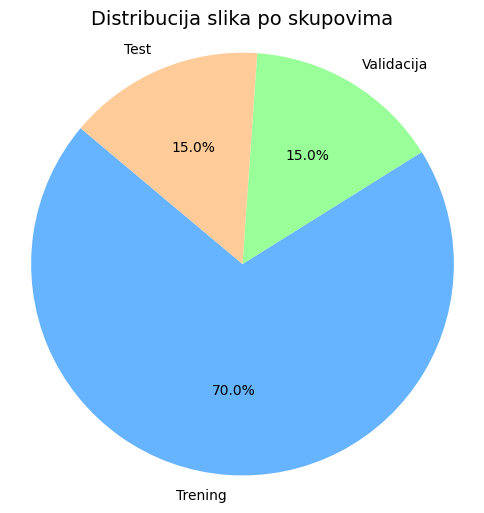

In [ ]:
import matplotlib.pyplot as plt

n_train = len(X_train)
n_val = len(X_val)
n_test = len(X_test)

print(f"Broj slika u trening skupu: {n_train}")
print(f"Broj slika u validacionom skupu: {n_val}")
print(f"Broj slika u test skupu: {n_test}")

labels = ['Trening', 'Validacija', 'Test']
sizes = [n_train, n_val, n_test]
colors = ['#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribucija slika po skupovima", fontsize=14)
plt.axis('equal')
plt.show()

# **5. NEURONSKA MREŽA I TRENIRANJE**

In [ ]:
# Parametri
IMAGE_SIZE = 384
NUM_CLASSES = 4

# Model
model = Sequential([
    Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),

    Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.4),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')
])

# Kompajliranje
optimizer = Adam(learning_rate=1e-4)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback-ovi
callbacks = [
    EarlyStopping(patience=8, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(patience=2, factor=0.4, min_lr=1e-10)
]

# Pregled modela
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 384, 384, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 384, 384, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 384, 384, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 192, 192, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 192, 192, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 192, 192, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 192, 192, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 192, 192, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 96, 96, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 96, 96, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 96, 96, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 96, 96, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 423,748 (1.62 MB)

 Trainable params: 422,788 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    validation_data=(X_val, y_val),
    epochs=25,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 192s 10s/step - accuracy: 0.3068 - loss: 1.6564 - val_accuracy: 0.2833 - val_loss: 2.4465 - learning_rate: 1.0000e-04
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.3358 - loss: 1.4674 - val_accuracy: 0.2833 - val_loss: 2.3102 - learning_rate: 1.0000e-04
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.4203 - loss: 1.3171 - val_accuracy: 0.2667 - val_loss: 2.5953 - learning_rate: 1.0000e-04
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.4717 - loss: 1.2566 - val_accuracy: 0.3000 - val_loss: 1.6285 - learning_rate: 1.0000e-04
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.4635 - loss: 1.2250 - val_accuracy: 0.4500 - val_loss: 1.4633 - learning_rate: 1.0000e-04
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.4684 - loss: 1.2815 - val_accuracy: 0.3333 - val_loss: 1.4336 - learning_rate: 1.0000e-04
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 184s 10s/step - accuracy: 

# **6. REZULTATI TRENIRANJA**

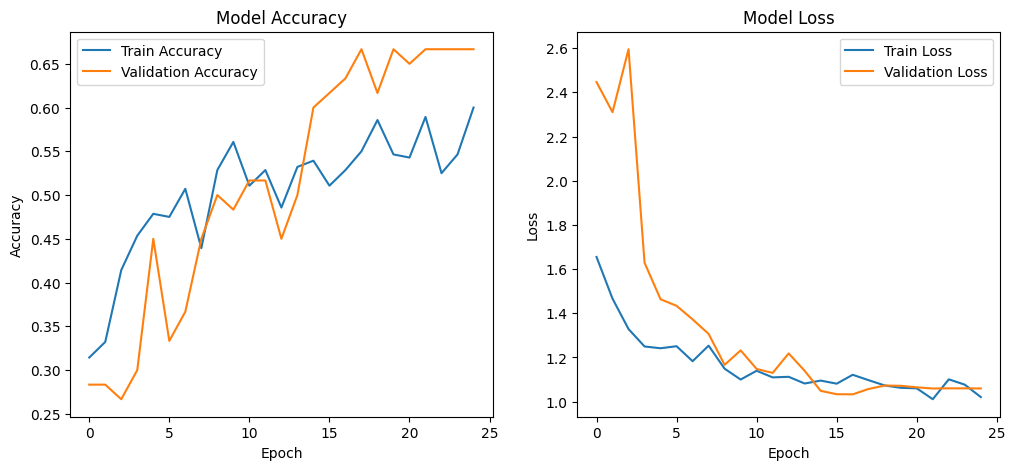

In [ ]:
# --- PLOT RESULTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# **7. TESTIRANJE I ANALIZA GREŠAKA**

In [ ]:
y_test_true = np.argmax(y_test, axis=1)
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


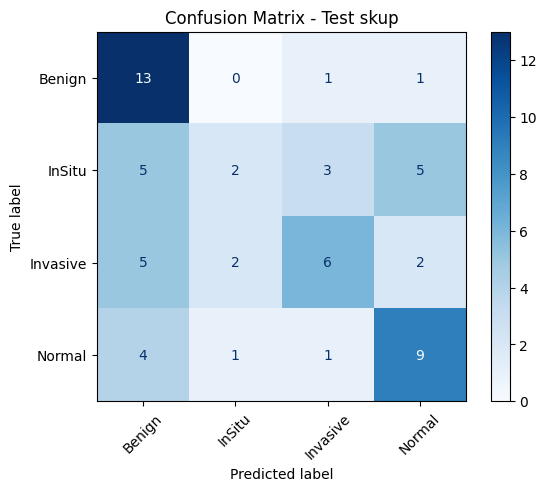

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Test skup")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
Ukupno testnih slika: 60
Broj pogrešnih predikcija: 30
Broj tačnih predikcija: 30


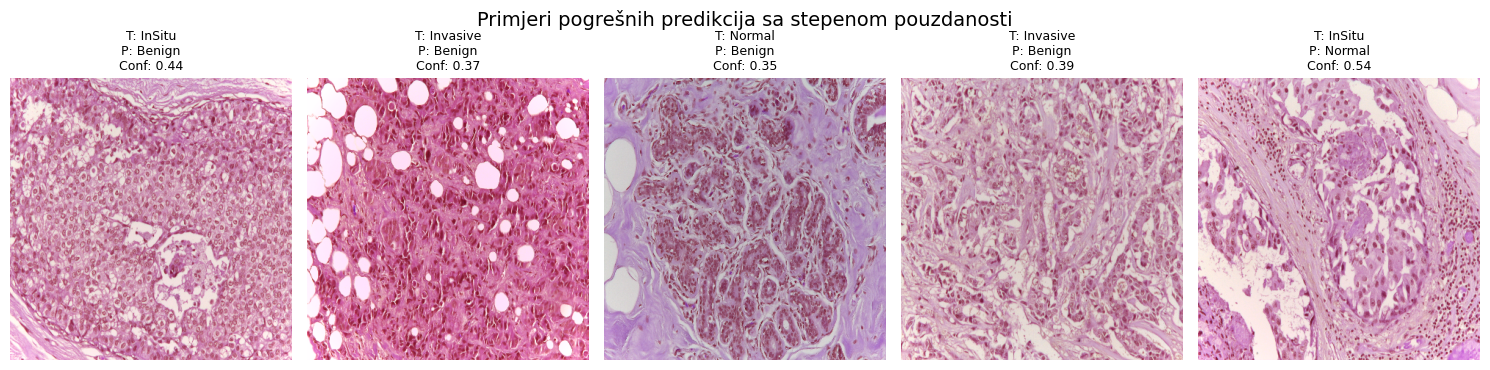

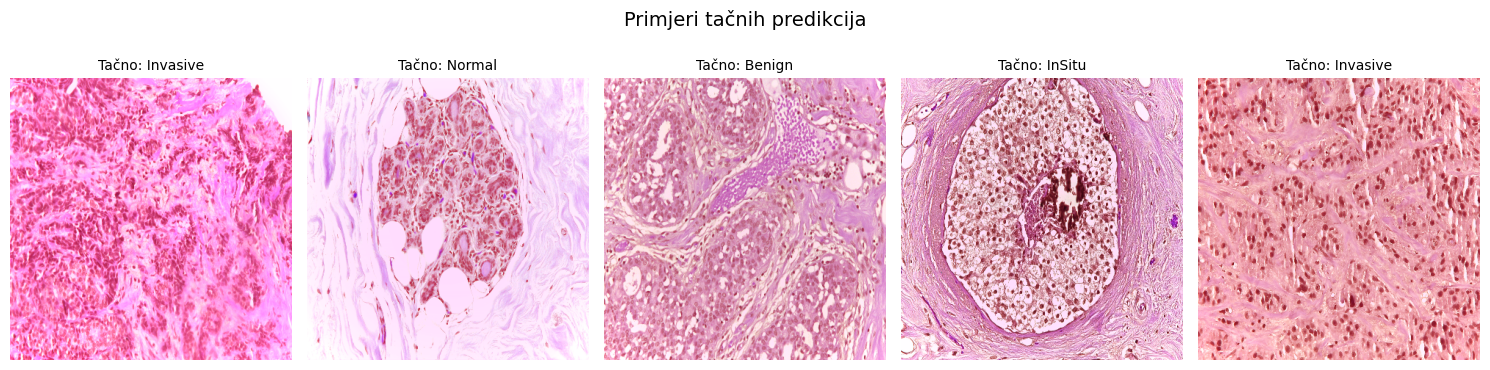

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

y_test_true = np.argmax(y_test, axis=1)
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

wrong_indices = [i for i in range(len(y_test_true)) if y_test_true[i] != y_test_pred[i]]
correct_indices = [i for i in range(len(y_test_true)) if y_test_true[i] == y_test_pred[i]]

print(f"Ukupno testnih slika: {len(y_test_true)}")
print(f"Broj pogrešnih predikcija: {len(wrong_indices)}")
print(f"Broj tačnih predikcija: {len(correct_indices)}")

sample_wrong = random.sample(wrong_indices, min(5, len(wrong_indices)))
plt.figure(figsize=(15, 4))
for i, idx in enumerate(sample_wrong):
    confidence = np.max(y_test_pred_probs[idx])
    pred_class = y_test_pred[idx]
    true_class = y_test_true[idx]
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].astype(np.uint8))
    plt.title(f"T: {class_names[true_class]}\nP: {class_names[pred_class]}\nConf: {confidence:.2f}", fontsize=9)
    plt.axis('off')
plt.suptitle("Primjeri pogrešnih predikcija sa stepenom pouzdanosti", fontsize=14)
plt.tight_layout()
plt.show()

sample_correct = random.sample(correct_indices, min(5, len(correct_indices)))
plt.figure(figsize=(15, 4))
for i, idx in enumerate(sample_correct):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].astype(np.uint8))
    plt.title(f"Tačno: {class_names[y_test_true[idx]]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Primjeri tačnih predikcija", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
prfrom sklearn.metrics import classification_report

y_test_true = np.argmax(y_test, axis=1)
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

print(classification_report(y_test_true, y_test_pred, target_names=class_names))

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
              precision    recall  f1-score   support

      Benign       0.48      0.87      0.62        15
      InSitu       0.40      0.13      0.20        15
    Invasive       0.55      0.40      0.46        15
      Normal       0.53      0.60      0.56        15

    accuracy                           0.50        60
   macro avg       0.49      0.50      0.46        60
weighted avg       0.49      0.50      0.46        60



# **8. INFERENCIJA MODELA**

In [ ]:
from google.colab import files
from PIL import Image
import io

def load_and_preprocess_user_image(uploaded_file):
    img = Image.open(uploaded_file).convert('RGB')
    img = img.resize((384, 384))
    img_array = np.array(img, dtype=np.float32)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

uploaded = files.upload()

for fn in uploaded.keys():
    print(f"Učitana slika: {fn}")
    img_path = io.BytesIO(uploaded[fn])
    img_preprocessed = load_and_preprocess_user_image(img_path)

    prediction = model.predict(img_preprocessed)
    predicted_class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predikcija: {class_names[predicted_class_index]} (pouzdanje: {confidence:.2f})")
